In [48]:
#impoting requires libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [12]:
#Reading PAN list
pan_list = pd.read_table("PAN_Dump.txt", header= None, names = ['PAN'])

In [13]:
#Creating a dataframe with PAN character in different columns
columns = ['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth', 'Ninth', 'Tenth']
pan_char = pd.DataFrame()
for i, col in enumerate(columns):
    pan_char[col] = pan_list.PAN.str[i]

In [14]:
pan_char.head()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
0,A,A,A,A,A,0,1,2,3,H
1,A,A,A,A,A,0,5,2,1,D
2,A,A,A,A,A,1,4,5,5,A
3,A,A,A,A,A,2,2,2,2,M
4,A,A,A,A,A,3,3,4,4,E


In [15]:
pan_char.describe()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
count,94055,94055,94055,94055,94055,94055,94055,94055,94055,94055
unique,6,26,26,10,26,10,10,10,10,16
top,A,A,A,P,S,1,8,6,0,B
freq,74637,14401,4636,88746,15593,9715,9511,9562,9549,6218


In [16]:
#Defining Input and Output domain
characters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
targetChar_16 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R'] #Possible check digits as mentioned in the mail
targetChar_26 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [64]:
targetChar_16.index('P')

13

In [24]:
def codepointFromChar(character):
    return int(characters.index(character))
def charFromCodepoint(codepoint):
    return characters[codepoint]
def generateChecksum(input_list, factor_format):
    summ = 0
    for i, char in enumerate(input_list):
        res = codepointFromChar(char)
        if i in factor_format:
            res = 2*res
        res = sum(map(int, str(res)))
        summ += res
    return summ
def targetCodepointFromChar_16(character):
    return int(targetChar_16.index(character))
def targetCodepointFromChar_26(character):
    return int(targetChar_26.index(character))
def targetCodepointFromChar_36(character):
    return int(characters.index(character))
def generateChecksumInt_16(input_list, factor_format):
    summ = generateChecksum(input_list, factor_format)
    return (16-(summ % 36))%16
def generateChecksumInt_26(input_list, factor_format):
    summ = generateChecksum(input_list, factor_format)
    return (26-(summ % 36))%26
def generateChecksumInt_36(input_list, factor_format):
    summ = generateChecksum(input_list, factor_format)
    return (36-(summ % 36))%36

In [25]:
#Creating a dataframe for easier analysis, coverting all characters to codepoint
pan_num = pd.DataFrame()
pan_num['First'] = pan_char['First'].apply(codepointFromChar)
pan_num['Second'] = pan_char['Second'].apply(codepointFromChar)
pan_num['Third'] = pan_char['Third'].apply(codepointFromChar)
pan_num['Fourth'] = pan_char['Fourth'].apply(codepointFromChar)
pan_num['Fifth'] = pan_char['Fifth'].apply(codepointFromChar)
pan_num['Sixth'], pan_num['Seventh'], pan_num['Eighth'], pan_num['Ninth'] = pan_char['Sixth'], pan_char['Seventh'], pan_char['Eighth'], pan_char['Ninth']
pan_num['Target_16'] = pan_char['Tenth'].apply(targetCodepointFromChar_16)
pan_num['Target_26'] = pan_char['Tenth'].apply(targetCodepointFromChar_26)
pan_num['Target_36'] = pan_char['Tenth'].apply(targetCodepointFromChar_36)
pan_num['036_16'] = pan_char.apply(lambda pan_char: generateChecksumInt_16(pan_char[columns[:-1]], [0,3,6]), axis=1)
pan_num['036_26'] = pan_char.apply(lambda pan_char: generateChecksumInt_26(pan_char[columns[:-1]], [0,3,6]), axis=1)
pan_num['036_36'] = pan_char.apply(lambda pan_char: generateChecksumInt_36(pan_char[columns[:-1]], [0,3,6]), axis=1)

In [26]:
pan_num.head()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Target_16,Target_26,Target_36,036_16,036_26,036_36
0,10,10,10,10,10,0,1,2,3,7,7,17,2,12,22
1,10,10,10,10,10,0,5,2,1,3,3,13,5,15,25
2,10,10,10,10,10,1,4,5,5,0,0,10,6,0,10
3,10,10,10,10,10,2,2,2,2,11,12,22,15,9,19
4,10,10,10,10,10,3,3,4,4,4,4,14,8,2,12


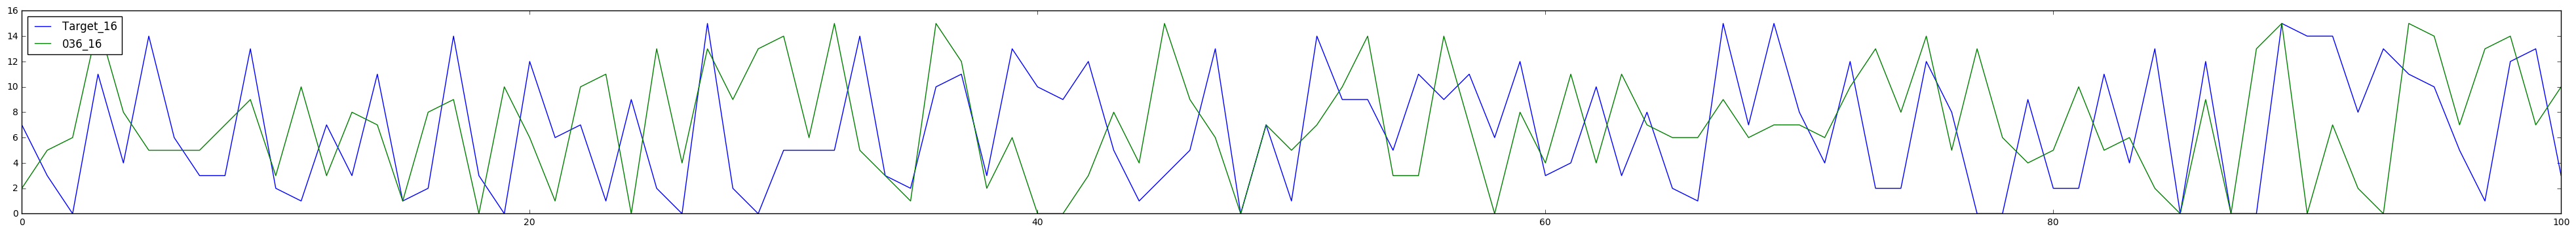

In [27]:
#Just checking for no apparent reason
pan_num.plot(y=['Target_16','036_16'], use_index=True, xlim=(0,100), figsize = (50,4))

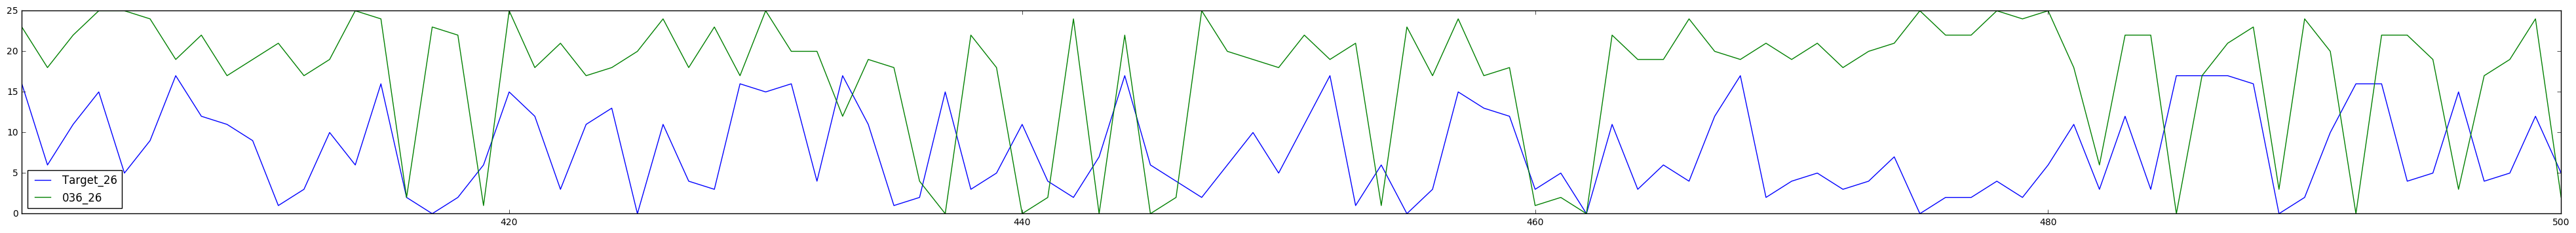

In [28]:
#Again no reason
pan_num.plot(y=['Target_26','036_26'], use_index=True, xlim=(401,500), figsize = (50,4))

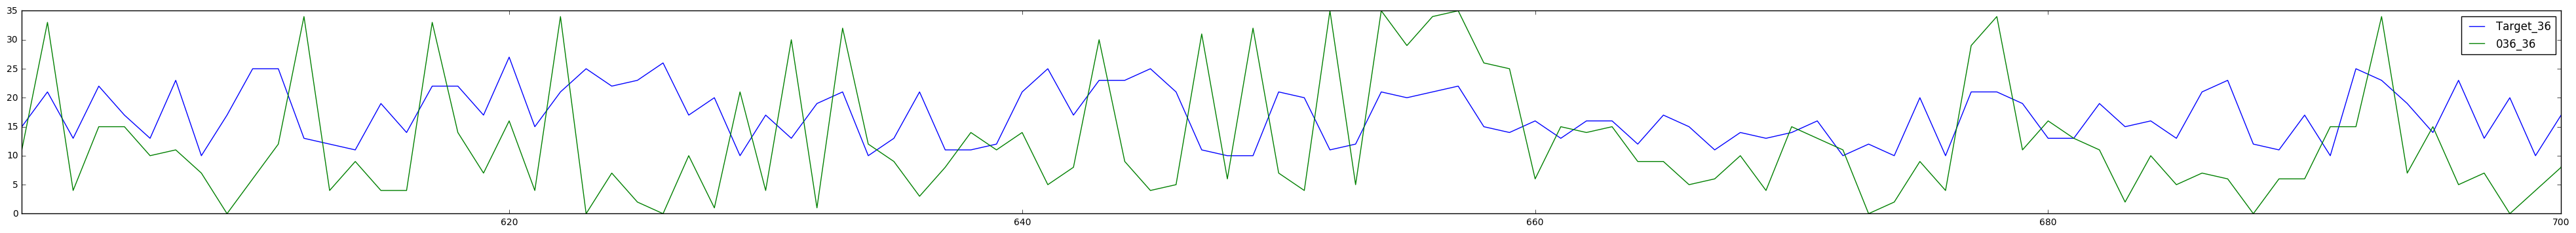

In [29]:
pan_num.plot(y=['Target_36','036_36'], use_index=True, xlim=(601,700), figsize = (50,4))

In [30]:
matching_pan_036_16=pan_char[pan_num['Target_16']==pan_num['036_16']]
matching_pan_036_16.describe()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
count,5903,5903,5903,5903,5903,5903,5903,5903,5903,5903
unique,6,26,26,9,25,10,10,10,10,16
top,A,A,A,P,K,4,7,8,0,P
freq,4679,911,298,5573,1004,623,617,616,658,537


In [32]:
matching_pan_036_26=pan_char[pan_num['Target_26']==pan_num['036_26']]
matching_pan_036_26.describe()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
count,2435,2435,2435,2435,2435,2435,2435,2435,2435,2435
unique,6,26,26,7,25,10,10,10,10,16
top,A,A,J,P,S,9,9,9,9,R
freq,1810,280,143,2332,571,290,305,344,324,468


In [31]:
matching_pan_036_36=pan_char[pan_num['Target_36']==pan_num['036_36']]
matching_pan_036_36.describe()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
count,1997,1997,1997,1997,1997,1997,1997,1997,1997,1997
unique,6,26,26,7,25,10,10,10,10,16
top,A,A,J,P,S,9,9,9,9,R
freq,1431,207,124,1920,547,276,277,311,302,275


In [17]:
not_matching_pan_036_P_16=pan_char[~(pan_num['Target_16']==pan_num['036_16']) & (pan_char['Fourth']=='P')]

In [18]:
not_matching_pan_036_P_16.describe()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
count,86414,86414,86414,86414,86414,86414,86414,86414,86414,86414
unique,6,26,26,1,25,10,10,10,10,16
top,A,A,B,P,K,1,1,3,0,B
freq,67621,9088,3543,86414,14799,8936,8745,8788,8832,5831


So, its safe to assume the algorithm disscussed in the does not apply for all the PAN samples(for all PAN with fourth character = 'P')

In [33]:
pan_num['034_16'] = pan_char.apply(lambda pan_char: generateChecksumInt_16(pan_char[columns[:-1]], [0,3,4]), axis=1)
pan_num['034_26'] = pan_char.apply(lambda pan_char: generateChecksumInt_26(pan_char[columns[:-1]], [0,3,4]), axis=1)
pan_num['034_36'] = pan_char.apply(lambda pan_char: generateChecksumInt_36(pan_char[columns[:-1]], [0,3,4]), axis=1)

In [34]:
matching_pan_034_16=pan_char[pan_num['Target_16']==pan_num['034_16']]
matching_pan_034_16.describe()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
count,5921,5921,5921,5921,5921,5921,5921,5921,5921,5921
unique,6,26,26,8,25,10,10,10,10,16
top,A,A,A,P,K,1,1,8,8,Q
freq,4725,862,303,5607,1004,633,612,616,639,510


In [35]:
matching_pan_034_26=pan_char[pan_num['Target_26']==pan_num['034_26']]
matching_pan_034_26.describe()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
count,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592
unique,6,26,26,7,25,10,10,10,10,16
top,A,A,S,P,S,9,9,9,9,R
freq,1950,284,135,2474,623,326,327,368,346,448


In [36]:
matching_pan_034_36=pan_char[pan_num['Target_36']==pan_num['034_36']]
matching_pan_034_36.describe()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth
count,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200
unique,6,26,26,7,25,10,10,10,10,16
top,A,A,S,P,S,9,9,9,9,R
freq,1606,204,131,2111,602,312,317,350,327,272


In [40]:
pan_num_4_A = pan_num[pan_char['Fourth']=='A']

In [65]:
pan_num_4_A.head()

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Target_16,Target_26,Target_36,036_16,036_26,036_36,034_16,034_26,034_36
0,10,10,10,10,10,0,1,2,3,7,7,17,2,12,22,2,12,22
1,10,10,10,10,10,0,5,2,1,3,3,13,5,15,25,0,10,20
2,10,10,10,10,10,1,4,5,5,0,0,10,6,0,10,9,3,13
3,10,10,10,10,10,2,2,2,2,11,12,22,15,9,19,0,10,20
4,10,10,10,10,10,3,3,4,4,4,4,14,8,2,12,10,4,14


In [42]:
pan_num_4_A.describe()

,First,Second,Third,Fourth,Fifth,Target_16,Target_26,Target_36,036_16,036_26,036_36,034_16,034_26,034_36
count,160.0,160.0,160.000000,160.0,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000
mean,10.0,10.0,10.693750,10.0,20.168750,6.762500,7.343750,17.343750,7.606250,11.906250,11.506250,6.900000,14.50000,11.675000
std,0.0,0.0,1.689765,0.0,6.942914,4.633061,5.303431,5.303431,4.565521,9.239508,7.373245,4.834624,9.40828,9.052294
min,10.0,10.0,10.000000,10.0,10.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,10.0,10.0,10.000000,10.0,13.000000,3.000000,3.000000,13.000000,4.000000,3.000000,7.000000,3.000000,4.00000,6.000000
50%,10.0,10.0,10.000000,10.0,20.000000,6.000000,6.000000,16.000000,7.000000,10.500000,11.000000,6.000000,18.50000,9.000000
75%,10.0,10.0,11.000000,10.0,27.000000,11.000000,12.000000,22.000000,11.000000,21.000000,14.250000,11.250000,23.00000,14.000000
max,10.0,10.0,20.000000,10.0,35.000000,15.000000,17.000000,27.000000,15.000000,25.000000,35.000000,15.000000,25.00000,35.000000


In [46]:
pan_num_4_A_train, pan_num_4_A_test, pan_num_4_A_Target_16_train, pan_num_4_A_Target_16_test = train_test_split(pan_num_4_A[columns[:-1]], pan_num_4_A['Target_16'], test_size=0.33)
lin_reg_A = LinearRegression()
lin_reg_A = lin_reg_A.fit(pan_num_4_A_train, pan_num_4_A_Target_16_train)
lin_reg_A.score(pan_num_4_A_test, pan_num_4_A_Target_16_test)

-0.10564943214664568

In [55]:
svr_A = SVR(kernel='poly', degree=3)
svr_A = svr_A.fit(pan_num_4_A_train, pan_num_4_A_Target_16_train)
svr_A.score(pan_num_4_A_test, pan_num_4_A_Target_16_test)

-5.8511324346992195

Realisation: regression won't work on codepoints of the characters, but it could work on the resulting values after adding the digits after appyling form_factor
Apply form_factor: will have to try multiplying different 